In [1]:
!pip install chart_studio
!pip install windrose
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from windrose import WindroseAxes
import os
print(os.listdir("../input"))
%matplotlib inline


     |████████████████████████████████| 64 kB 1.8 MB/s 
['testwindpower', 'wind-turbine-scada-dataset']


/opt/conda/lib/python3.7/site-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/opt/conda/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/opt/conda/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/opt/conda/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  retu

In [2]:
data_T_start=pd.read_csv("../input/wind-turbine-scada-dataset/T1.csv")
data_T_start.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [3]:
turbine_no="T1" #for powercurve graph

In [4]:
data_T_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [5]:
data1_T=data_T_start.copy()

In [6]:
data1_T.rename(columns={'LV ActivePower (kW)':'ActivePower(kW)',"Wind Speed (m/s)":"WindSpeed(m/s)","Wind Direction (°)":"Wind_Direction"},
                inplace=True)
data1_T.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [7]:
data1_T.rename(columns={'Date/Time':'Time'},inplace=True)
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [8]:
#function for finding months
def find_month(x):
    if " 01 " in x:
        return "Jan"
    elif " 02 " in x:
        return "Feb"
    elif " 03 " in x:
        return "March"    
    elif " 04 " in x:
        return "April"    
    elif " 05 " in x:
        return "May"    
    elif " 06 " in x:
        return "June"    
    elif " 07 " in x:
        return "July"    
    elif " 08 " in x:
        return "August"    
    elif " 09 " in x:
        return "Sep"    
    elif " 10 " in x:
        return "Oct"    
    elif " 11 " in x:
        return "Nov"    
    else:
        return "Dec"    

In [9]:
#add months
data1_T['Month']=data1_T.Time.apply(find_month)

In [10]:
data1_T.Month.unique()

array(['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August',
       'Sep', 'Oct', 'Nov', 'Dec'], dtype=object)

In [11]:
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan


In [12]:
#function for rewriting wind speed for 0.5 intervals. 
#For example: wind speeds between 3.25 and 3.75 turns 3.5,wind speeds between 3.75 and 4.25 turns 4.0
def mean_speed(x):
    list=[]
    i=0.25
    while i<=25.5:
        list.append(i)
        i+=0.5
        
    for i in list:
        if x < i:
            x=i-0.25
            return x

In [13]:
#adding a new column as "mean_WindSpeed" with function mean_speed().
data1_T["mean_WindSpeed"]=data1_T["WindSpeed(m/s)"].apply(mean_speed)
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5


In [14]:
#function for rewriting wind direction for 30 intervals. 
#For example: wind directions between 15 and 45 turns 30,wind speeds between 45 and 75 turns 60
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [15]:
#adding a new column as "mean_Direction" with function mean_direction().
data1_T["mean_Direction"]=data1_T["Wind_Direction"].apply(mean_direction)
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed,mean_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270


In [16]:
#function for rewriting wind direction with letters. 
#For example: 0=N, 30=NNE 60=NEE etc.
def find_direction(x):
    if x==0:
        return "N"
    if x==30:
        return "NNE"
    if x==60:
        return "NEE" 
    if x==90:
        return "E" 
    if x==120:
        return "SEE" 
    if x==150:
        return "SSE" 
    if x==180:
        return "S" 
    if x==210:
        return "SSW" 
    if x==240:
        return "SWW" 
    if x==270:
        return "W" 
    if x==300:
        return "NWW" 
    if x==330:
        return "NNW"
  

In [17]:
#adding a new column as "Direction" with function find_direction().
data1_T["Direction"]=data1_T["mean_Direction"].apply(find_direction)
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed,mean_Direction,Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270,W
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270,W
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270,W
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270,W
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270,W


In [18]:
#Number of wind speed values between 3.5 and 25. 
len(data1_T["WindSpeed(m/s)"][(data1_T["WindSpeed(m/s)"]>3.5) & (data1_T["WindSpeed(m/s)"]<=25)])

40634

In [19]:
#Values bigger than 25. 
data1_T["WindSpeed(m/s)"][data1_T["WindSpeed(m/s)"]>25].value_counts()

25.206011    1
Name: WindSpeed(m/s), dtype: int64

In [20]:
#Remove the data that wind speed is smaller than 3.5 and bigger than 25.5
#We do that because according to turbine power curve turbine works between these values.
data2_T=data1_T[(data1_T["WindSpeed(m/s)"]>3.5) & (data1_T["WindSpeed(m/s)"]<=25.5)]

In [21]:
#Number of values where wind speed is bigger than 3.5 and active power is zero. 
#If wind speed is bigger than 3.5 and active power is zero, this means turbine is out of order. we must eliminate these.
len(data2_T["ActivePower(kW)"][(data2_T["ActivePower(kW)"]==0)&(data2_T["WindSpeed(m/s)"]>3.5)])

2217

In [22]:
#Eliminate datas where wind speed is bigger than 3.5 and active power is zero.
data3_T=data2_T[((data2_T["ActivePower(kW)"]!=0)&(data2_T["WindSpeed(m/s)"]>3.5)) | (data2_T["WindSpeed(m/s)"]<=3.5)]

In [23]:
#Number of values
len(data3_T["WindSpeed(m/s)"])

38418

In [24]:
data3_T.head(10)

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed,mean_Direction,Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270,W
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270,W
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270,W
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270,W
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270,W
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,Jan,5.5,270,W
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,Jan,6.0,270,W
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,Jan,5.5,270,W
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,Jan,5.5,240,SWW
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,Jan,5.5,270,W


In [25]:
#the mean value of Nordex_Powercurve(kW) when mean_WindSpeed is 5.5
data3_T["Theoretical_Power_Curve (KWh)"][data3_T["mean_WindSpeed"]==5.5].mean()

472.0957519264287

In [26]:
#we create clean data and add a columns where calculating losses. 
#Loss is difference between the Nordex_Powercurve and ActivePower. 
data_T_clean=data3_T.sort_values("Time")
data_T_clean["Loss_Value(kW)"]=data_T_clean["Theoretical_Power_Curve (KWh)"]-data_T_clean["ActivePower(kW)"]
data_T_clean["Loss(%)"]=data_T_clean["Loss_Value(kW)"]/data_T_clean["Theoretical_Power_Curve (KWh)"]*100
#round the values to 2 digit.
data_T_clean=data_T_clean.round({'ActivePower(kW)': 2, 'WindSpeed(m/s)': 2, 'Theoretical_Power_Curve (KWh)': 2,
                                   'Wind_Direction': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})

data_T_clean.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed,mean_Direction,Direction,Loss_Value(kW),Loss(%)
0,01 01 2018 00:00,380.05,5.31,416.33,259.99,Jan,5.5,270,W,36.28,8.71
1,01 01 2018 00:10,453.77,5.67,519.92,268.64,Jan,5.5,270,W,66.15,12.72
2,01 01 2018 00:20,306.38,5.22,390.90,272.56,Jan,5.0,270,W,84.52,21.62
3,01 01 2018 00:30,419.65,5.66,516.13,271.26,Jan,5.5,270,W,96.48,18.69
4,01 01 2018 00:40,380.65,5.58,491.70,265.67,Jan,5.5,270,W,111.05,22.59


In [27]:
#creating summary speed dataframe from clean data.
DepGroupT_speed = data_T_clean.groupby("mean_WindSpeed")
data_T_speed=DepGroupT_speed.mean()
#removing the unnecessary columns.
data_T_speed.drop(columns={"WindSpeed(m/s)","Wind_Direction","mean_Direction"},inplace=True)
#creating a windspeed column from index values.
listTspeed_WS=data_T_speed.index.copy()
data_T_speed["WindSpeed(m/s)"]=listTspeed_WS
#changing the place of columns.
data_T_speed=data_T_speed[["WindSpeed(m/s)","ActivePower(kW)","Theoretical_Power_Curve (KWh)","Loss_Value(kW)","Loss(%)"]]
#changing the index numbers.
data_T_speed["Index"]=list(range(1,len(data_T_speed.index)+1))
data_T_speed.set_index("Index",inplace=True)
#rounding the values to 2 digit
data_T_speed=data_T_speed.round({"WindSpeed(m/s)": 1, 'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})
#creating a count column that shows the number of wind speed from clean data.
data_T_speed["count"]=[len(data_T_clean["mean_WindSpeed"][data_T_clean["mean_WindSpeed"]==i]) 
                        for i in data_T_speed["WindSpeed(m/s)"]]


In [28]:
data_T_speed

,WindSpeed(m/s),ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count
Index,,,,,,
1,3.5,51.68,68.61,16.94,24.14,675
2,4.0,98.33,127.75,29.42,23.26,1736
3,4.5,183.96,222.48,38.52,17.44,1794
4,5.0,285.47,336.32,50.86,15.24,1725
5,5.5,402.30,472.10,69.80,14.84,2012
6,6.0,546.76,627.10,80.34,12.84,2216
7,6.5,713.07,807.67,94.60,11.76,2274
8,7.0,902.86,1015.80,112.94,11.16,2320
9,7.5,1122.43,1256.94,134.51,10.72,2254


In [29]:
#create summary direction dataframe from clean data.
DepGroupT_direction = data_T_clean.groupby("Direction")
data_T_direction=DepGroupT_direction.mean()
#remove the unnecessary columns.
data_T_direction.drop(columns={"WindSpeed(m/s)","Wind_Direction"},inplace=True)
#create a column from index.
listTdirection_Dir=data_T_direction.index.copy()
data_T_direction["Direction"]=listTdirection_Dir
#change the name of mean_WindSpeed column as  WindSpeed.
data_T_direction["WindSpeed(m/s)"]=data_T_direction["mean_WindSpeed"]
data_T_direction.drop(columns={"mean_WindSpeed"},inplace=True)
#change the place of columns.
data_T_direction=data_T_direction[["Direction","mean_Direction","ActivePower(kW)","Theoretical_Power_Curve (KWh)","WindSpeed(m/s)",
                                     "Loss_Value(kW)","Loss(%)"]]
#change the index numbers.
data_T_direction["Index"]=list(range(1,len(data_T_direction.index)+1))
data_T_direction.set_index("Index",inplace=True)
#create a count column that shows the number of directions from clean data.
data_T_direction["count"]=[len(data_T_clean["Direction"][data_T_clean["Direction"]==i]) 
                        for i in data_T_direction["Direction"]]
#round the values to 2 digit
data_T_direction=data_T_direction.round({'WindSpeed(m/s)': 1,'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2,
                                           'Loss_Value(kW)': 2, 'Loss(%)': 2})
#sort by mean_Direction
data_T_direction=data_T_direction.sort_values("mean_Direction")
data_T_direction.drop(columns={"mean_Direction"},inplace=True)

In [30]:
data_T_direction

,Direction,ActivePower(kW),Theoretical_Power_Curve (KWh),WindSpeed(m/s),Loss_Value(kW),Loss(%),count
Index,,,,,,,
2,N,1171.54,1383.10,7.4,211.56,17.91,1294
4,NNE,1511.73,1739.18,8.4,227.45,13.76,7533
3,NEE,1773.33,1969.08,8.8,195.75,13.02,13042
1,E,1209.27,1345.86,7.4,136.59,3.68,2088
8,SEE,579.82,631.63,5.6,51.80,7.88,485
9,SSE,912.14,1047.23,6.7,135.09,16.16,511
7,S,2409.73,2517.83,11.7,108.10,6.82,3710
10,SSW,2300.71,2439.50,10.9,138.79,8.12,6119
11,SWW,1252.60,1359.33,7.4,106.73,11.59,1663


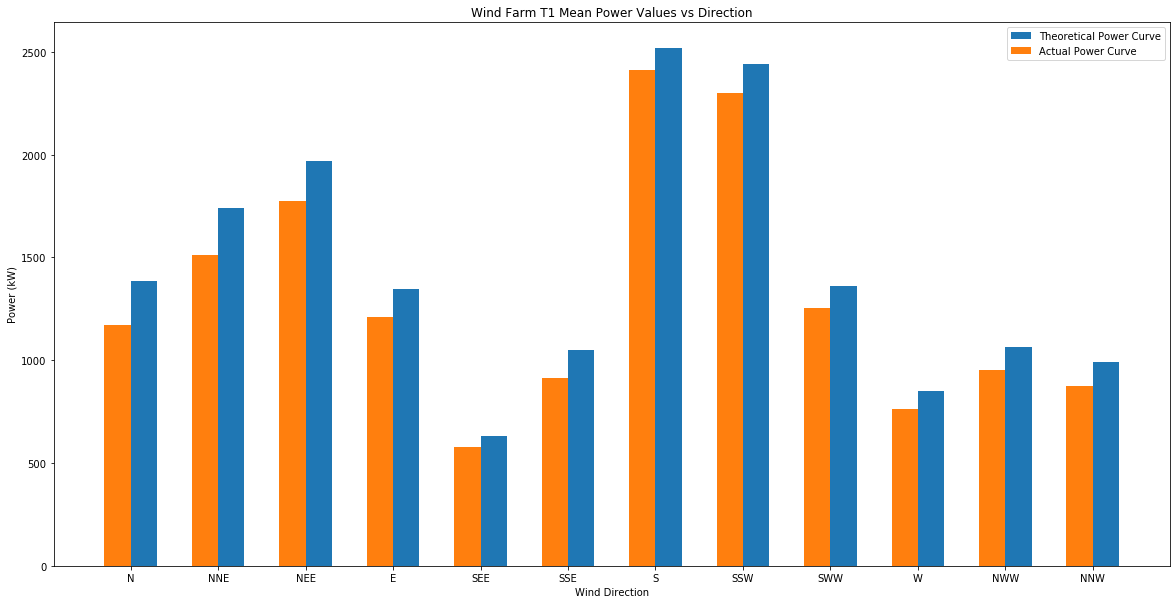

In [31]:
#Drawing graph of mean powers according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(data_T_direction["Direction"],data_T_direction["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",align="edge",width=0.3)
    plt.bar(data_T_direction["Direction"],data_T_direction["ActivePower(kW)"],label="Actual Power Curve",align="edge",width=-0.3)
    plt.xlabel("Wind Direction")
    plt.ylabel("Power (kW)")
    plt.title("Wind Farm {} Mean Power Values vs Direction".format(turbine_no))
    plt.legend()
    plt.show()
bar_graph()

In [32]:
#creating summary direction total dataframe from direction data.
data_T_direction_total=data_T_direction.copy()
#removing the unnecessary columns.
data_T_direction_total.drop(columns={"count","ActivePower(kW)","Theoretical_Power_Curve (KWh)","Loss_Value(kW)","Loss(%)"},inplace=True)
#calculating the total values from direction data.
data_T_direction_total["Total_Generation(MWh)"]=data_T_direction["ActivePower(kW)"]*data_T_direction["count"]/6000
data_T_direction_total["Theoretical_PC_Total_Generation(MWh)"]=data_T_direction["Theoretical_Power_Curve (KWh)"]*data_T_direction["count"]/6000
data_T_direction_total["Total_Loss(MWh)"]=data_T_direction_total["Theoretical_PC_Total_Generation(MWh)"]-data_T_direction_total["Total_Generation(MWh)"]
data_T_direction_total["Loss(%)"]=data_T_direction_total["Total_Loss(MWh)"]/data_T_direction_total["Theoretical_PC_Total_Generation(MWh)"]*100
#rounding the values to 2 digit
data_T_direction_total=data_T_direction_total.round({'WindSpeed(m/s)': 1,'Total_Generation(MWh)': 2, 'Theoretical_PC_Total_Generation(MWh)': 2,
                                           'Total_Loss(MWh)': 2, 'Loss(%)': 2})
#changing the place of columns.
data_T_direction_total=data_T_direction_total[["Direction","Total_Generation(MWh)","Theoretical_PC_Total_Generation(MWh)","WindSpeed(m/s)",
                                     "Total_Loss(MWh)","Loss(%)"]]

In [33]:
data_T_direction_total

,Direction,Total_Generation(MWh),Theoretical_PC_Total_Generation(MWh),WindSpeed(m/s),Total_Loss(MWh),Loss(%)
Index,,,,,,
2,N,252.66,298.29,7.4,45.63,15.30
4,NNE,1897.98,2183.54,8.4,285.56,13.08
3,NEE,3854.63,4280.12,8.8,425.50,9.94
1,E,420.83,468.36,7.4,47.53,10.15
8,SEE,46.87,51.06,5.6,4.19,8.20
9,SSE,77.68,89.19,6.7,11.51,12.90
7,S,1490.02,1556.86,11.7,66.84,4.29
10,SSW,2346.34,2487.88,10.9,141.54,5.69
11,SWW,347.18,376.76,7.4,29.58,7.85


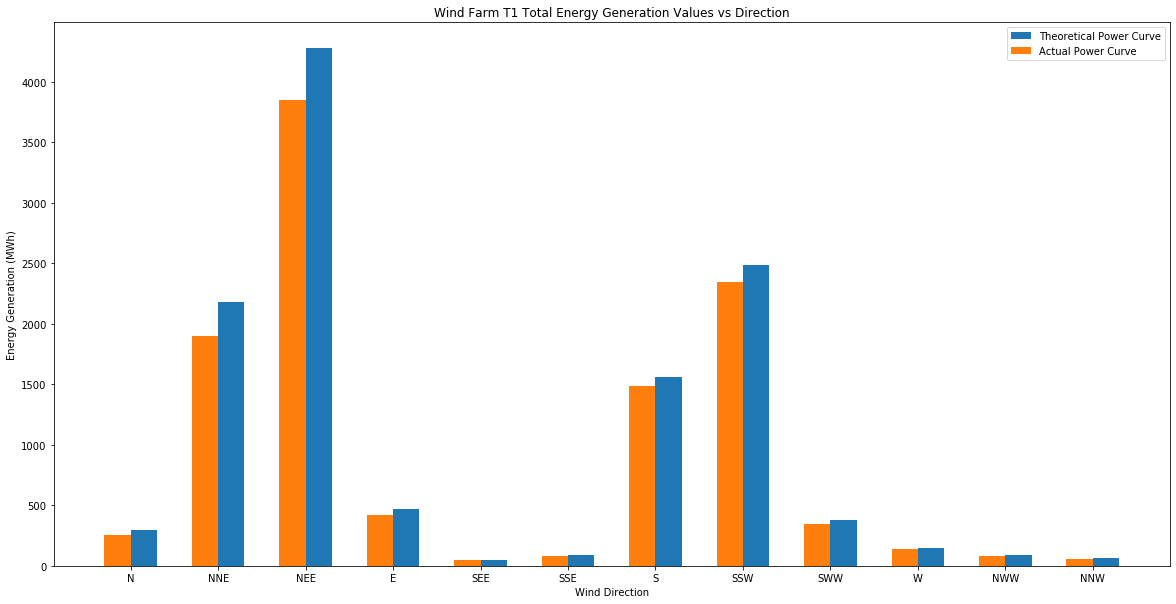

In [34]:
#Drawing graph of total generations according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(data_T_direction_total["Direction"],data_T_direction_total["Theoretical_PC_Total_Generation(MWh)"],label="Theoretical Power Curve",align="edge",width=0.3)
    plt.bar(data_T_direction_total["Direction"],data_T_direction_total["Total_Generation(MWh)"],label="Actual Power Curve",align="edge",width=-0.3)
    plt.xlabel("Wind Direction")
    plt.ylabel("Energy Generation (MWh)")
    plt.title("Wind Farm {} Total Energy Generation Values vs Direction".format(turbine_no))
    plt.legend()
    plt.show()
bar_graph()

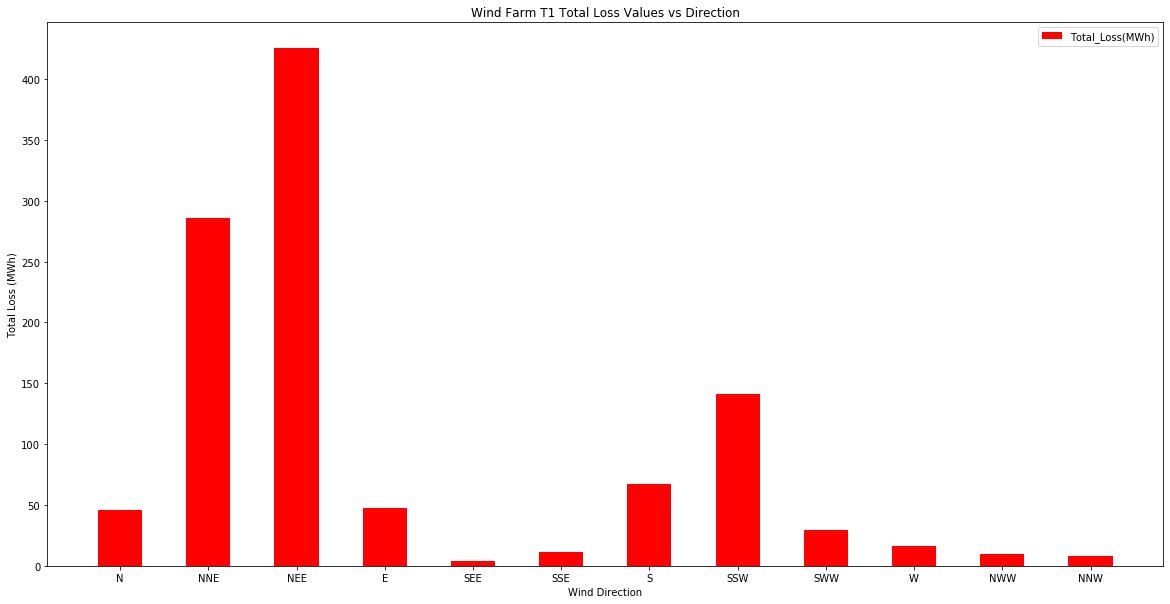

In [35]:
#Drawing graph of total loss according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(data_T_direction_total["Direction"],data_T_direction_total["Total_Loss(MWh)"],
            label="Total_Loss(MWh)",align="center",width=0.5, color="red",picker=5)
    plt.xlabel("Wind Direction")
    plt.ylabel("Total Loss (MWh)")
    plt.title("Wind Farm {} Total Loss Values vs Direction".format(turbine_no))
    plt.legend()
    plt.show()
bar_graph()

In [36]:
#creating summary dataframes for all directions from clean data in a for loop as we did when creating direction dataframe.
list_data=[]
list_yon=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]
for i in range(0,12):
    data1T_A=data_T_clean[data_T_clean["Direction"]==list_yon[i]]
    #
    DepGroup_A = data1T_A.groupby("mean_WindSpeed")
    data_T_A=DepGroup_A.mean()
    #
    data_T_A.drop(columns={"WindSpeed(m/s)","Wind_Direction","mean_Direction"},inplace=True)
    #
    listTA_WS=data_T_A.index.copy()
    data_T_A["WindSpeed(m/s)"]=listTA_WS
    #
    data_T_A=data_T_A[["WindSpeed(m/s)","ActivePower(kW)","Theoretical_Power_Curve (KWh)","Loss_Value(kW)","Loss(%)"]]
    #
    data_T_A["Index"]=list(range(1,len(data_T_A.index)+1))
    data_T_A.set_index("Index",inplace=True)
    #
    data_T_A=data_T_A.round({'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})
    #
    data_T_A["count"]=[len(data1T_A["mean_WindSpeed"][data1T_A["mean_WindSpeed"]==x]) 
                            for x in data_T_A["WindSpeed(m/s)"]]
    list_data.append(data_T_A)
    
data_T_N=list_data[0]
data_T_NNE=list_data[1]
data_T_NEE=list_data[2]
data_T_E=list_data[3]
data_T_SEE=list_data[4]
data_T_SSE=list_data[5]
data_T_S=list_data[6]
data_T_SSW=list_data[7]
data_T_SWW=list_data[8]
data_T_W=list_data[9]
data_T_NWW=list_data[10]
data_T_NNW=list_data[11]

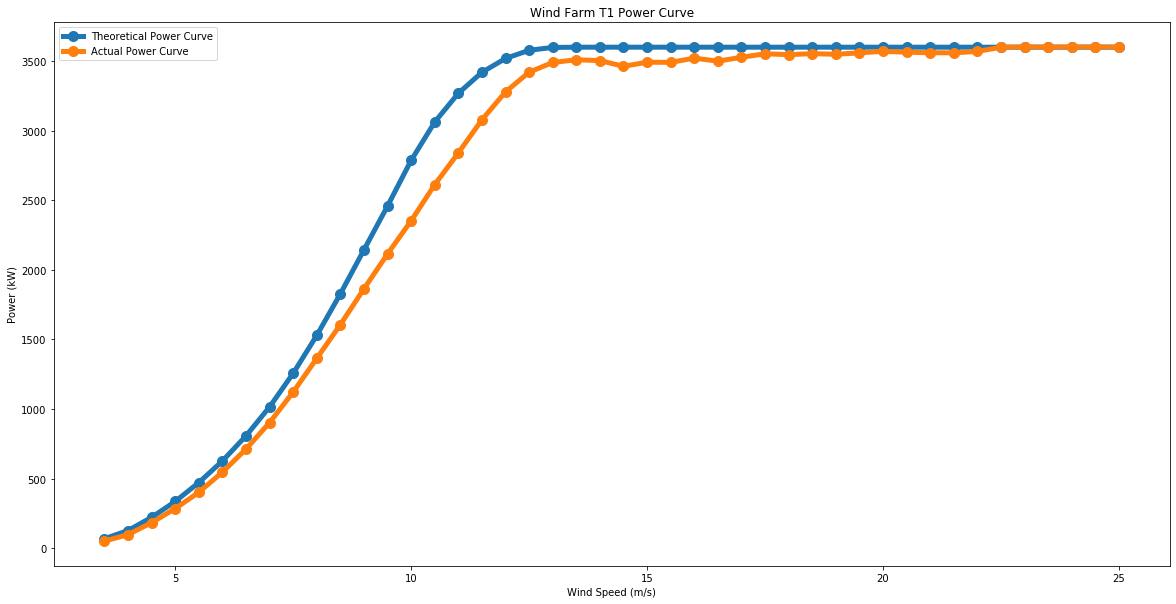

In [37]:
#Drawing power curve of the turbine.
def graph_WT():
    fig = plt.figure(figsize=(20,10))
    plt.plot(data_T_speed["WindSpeed(m/s)"],data_T_speed["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.plot(data_T_speed["WindSpeed(m/s)"],data_T_speed["ActivePower(kW)"],label="Actual Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Power (kW)")
    plt.title("Wind Farm {} Power Curve".format(turbine_no))
    plt.legend()
    plt.show()
    fig.savefig("{}_Powercurve.png".format(turbine_no))
    plt.close(fig)
        
graph_WT()

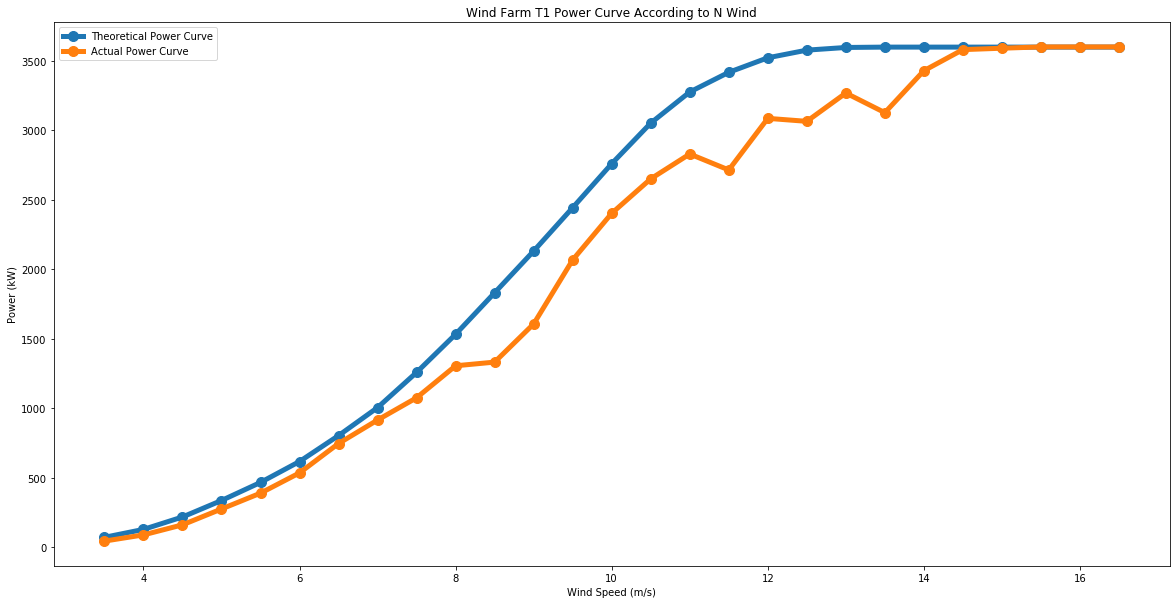

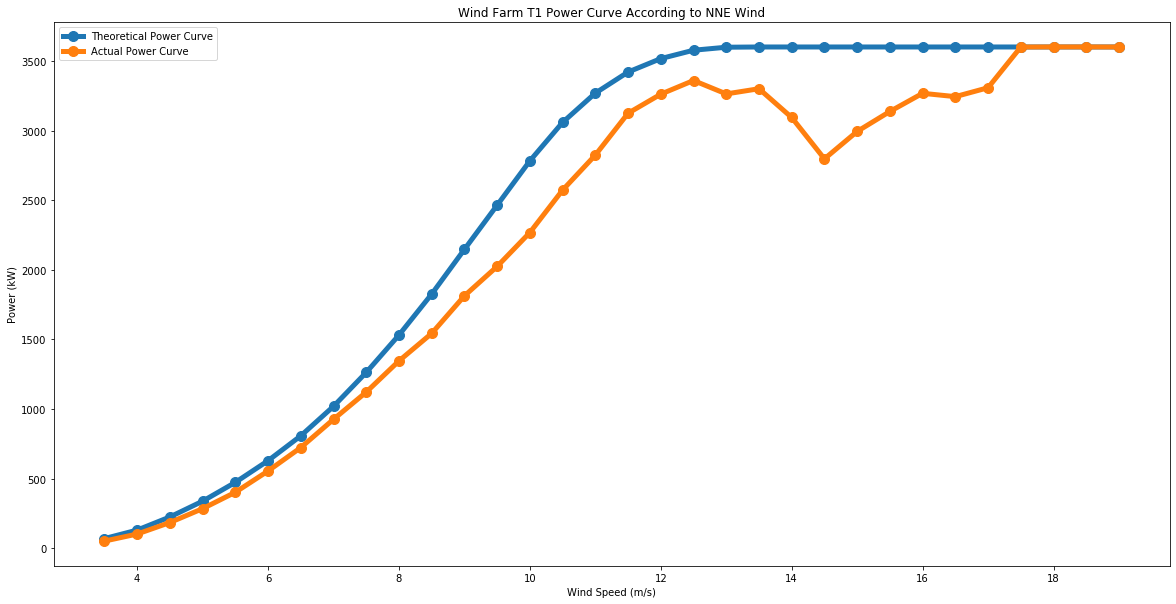

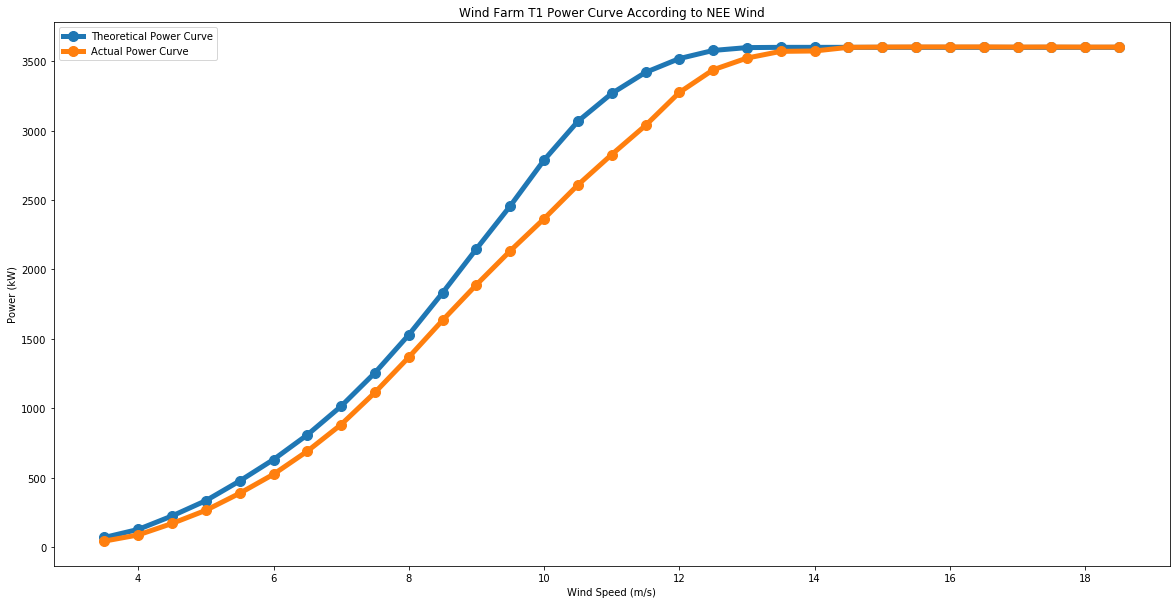

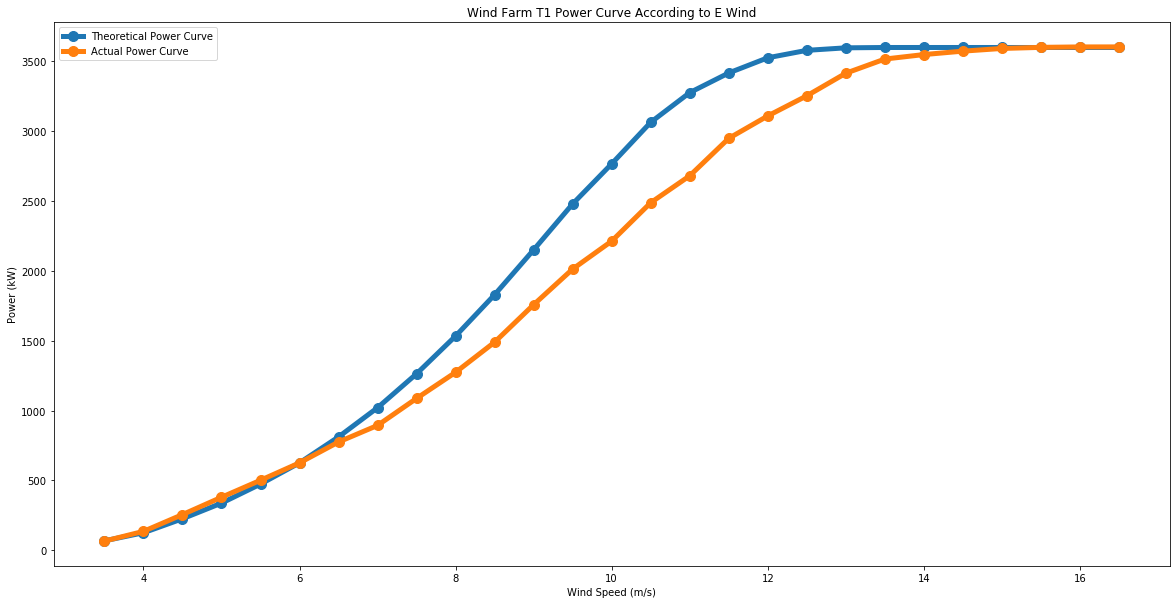

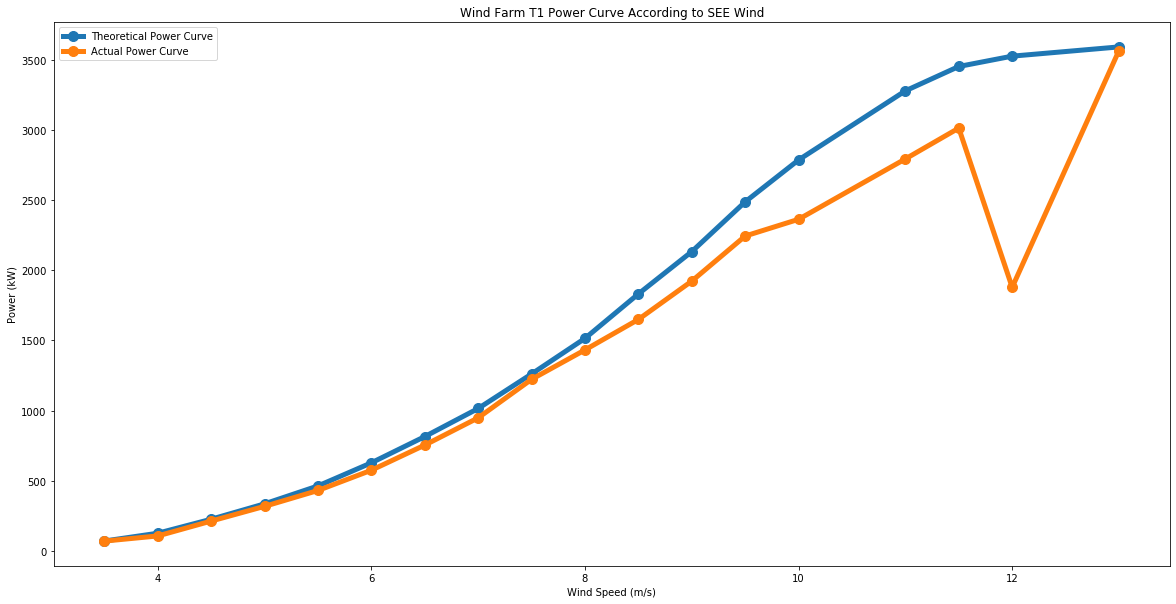

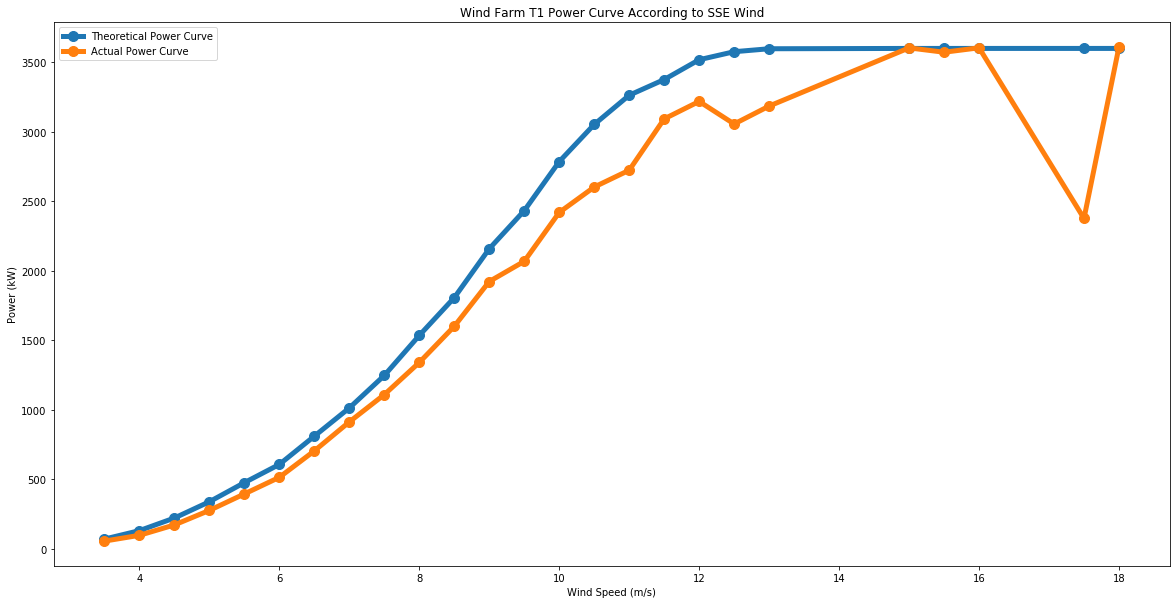

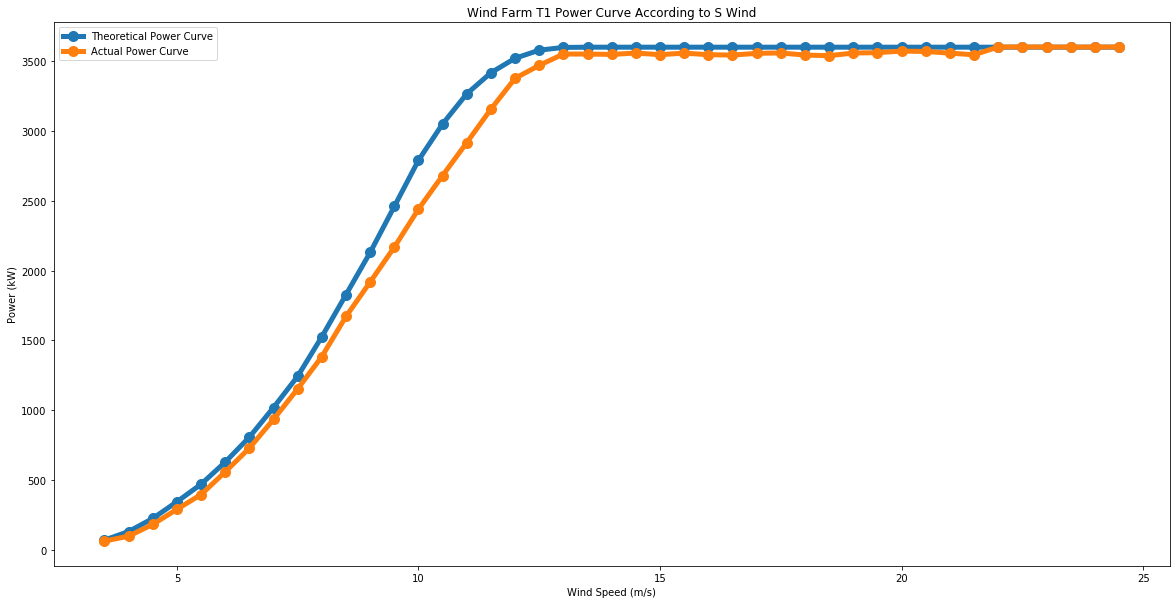

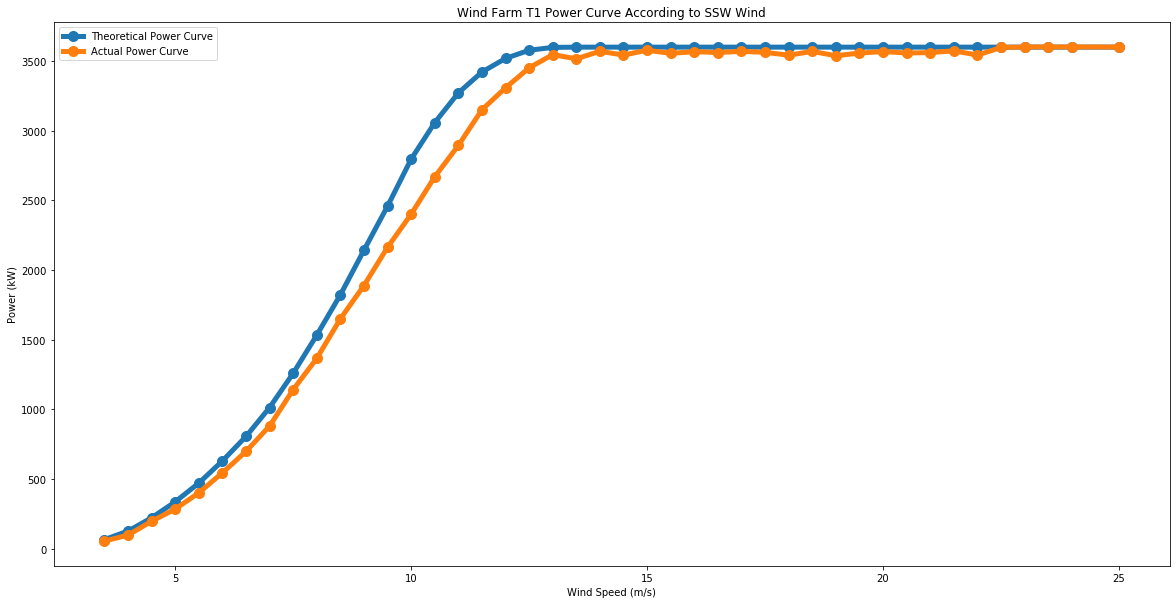

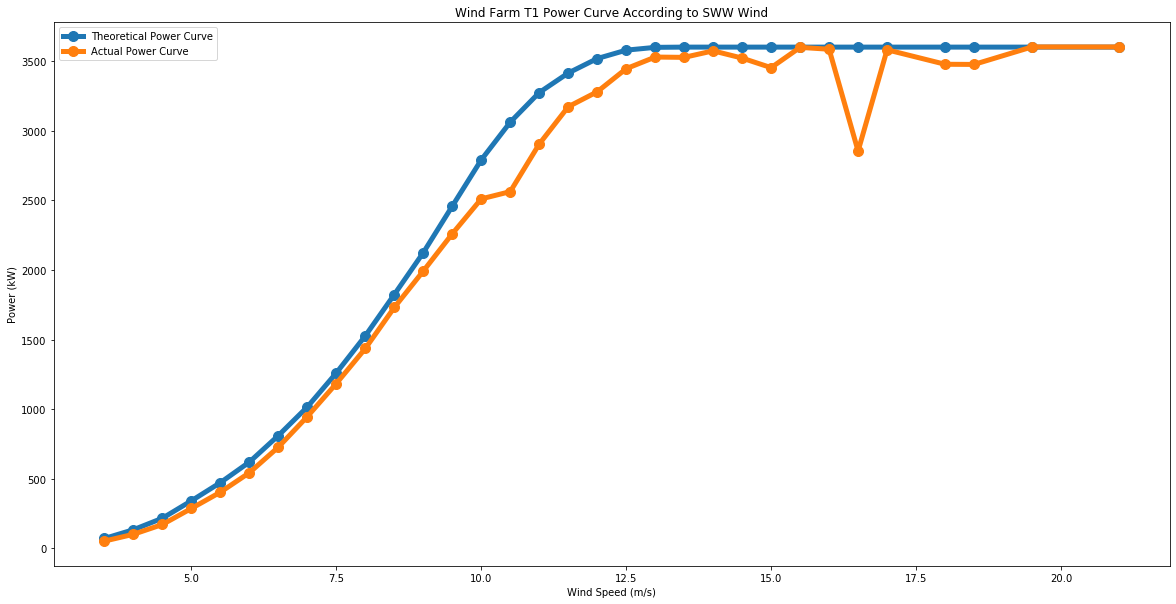

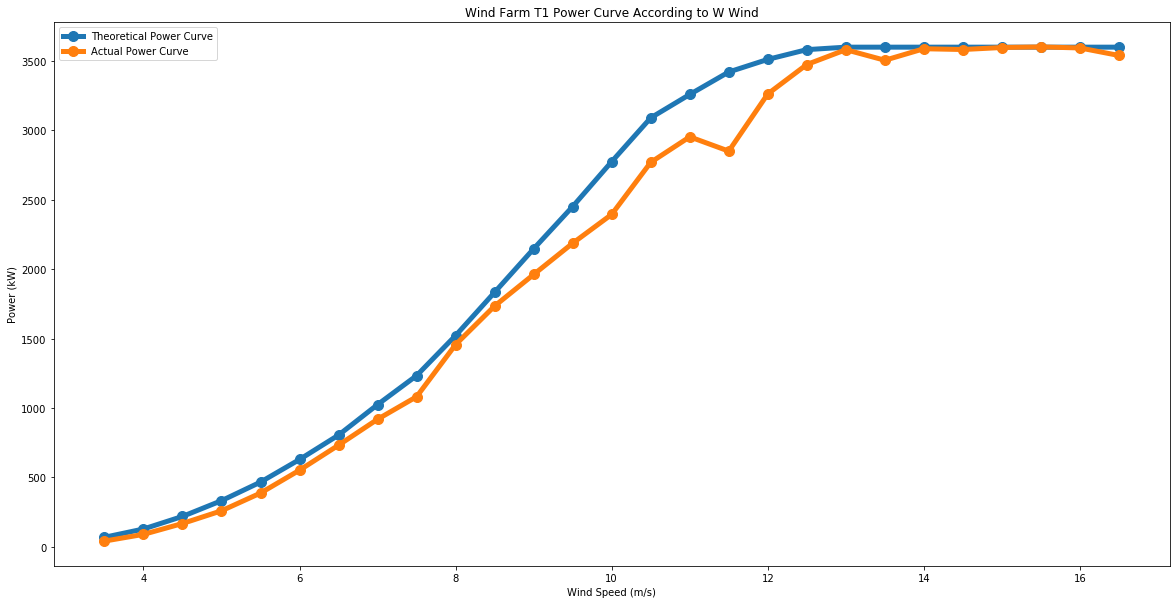

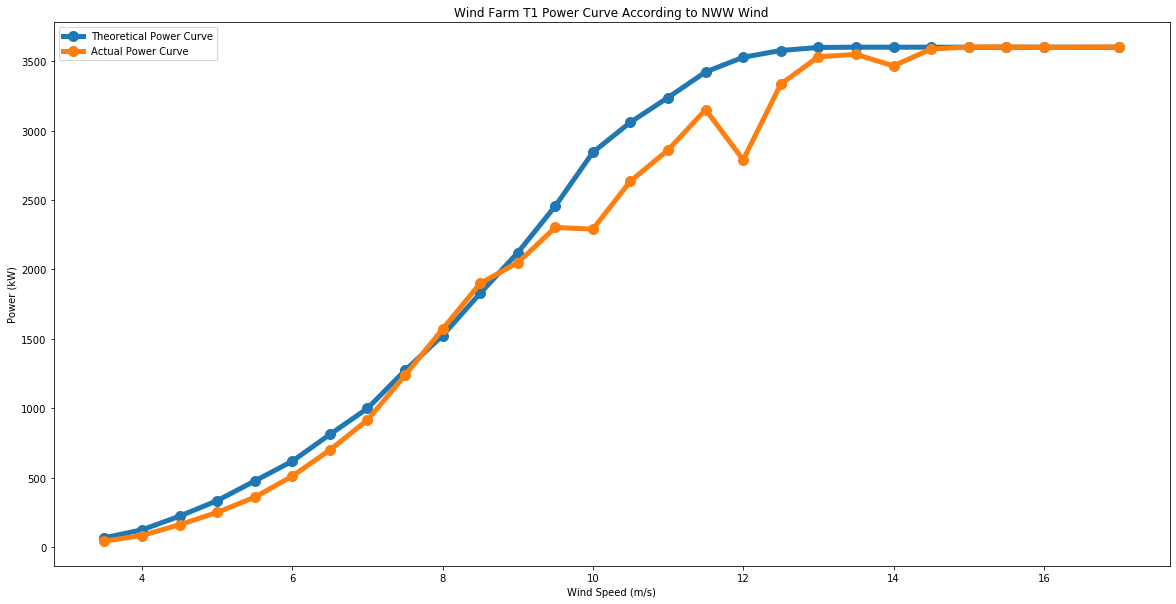

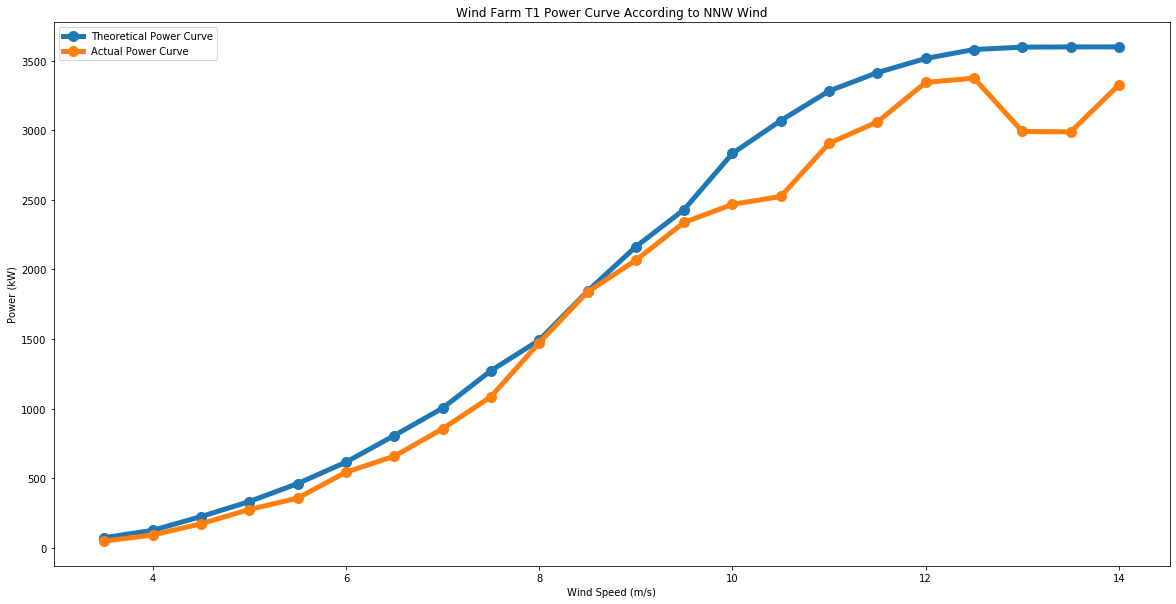

In [38]:
#Drawing power curve of the turbine for all directions.
list_table=[data_T_N,data_T_NNE,data_T_NEE,data_T_E,data_T_SEE,data_T_SSE,data_T_S,
            data_T_SSW,data_T_SWW,data_T_W,data_T_NWW,data_T_NNW]

list_tableName=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]

def graph_T(i):
    fig = plt.figure(figsize=(20,10))  
    plt.plot(list_table[i]["WindSpeed(m/s)"],list_table[i]["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.plot(list_table[i]["WindSpeed(m/s)"],list_table[i]["ActivePower(kW)"],label="Actual Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Power (kW)")
    plt.title("Wind Farm {} Power Curve According to {} Wind".format(turbine_no,list_tableName[i]))
    plt.legend()
    plt.show()
    fig.savefig("{}_{}_Powercurve.jpeg".format(turbine_no,list_tableName[i]))
    plt.close(fig)

# "N"=0, "NNE"=1,"NEE"=2,"E"=3,"SEE"=4,"SSE"=5,"S"=6,"SSW"=7,"SWW"=8,"W"=9,"NWW"=10,"NNW"=11

for i in range(0,12):
    graph_T(i)

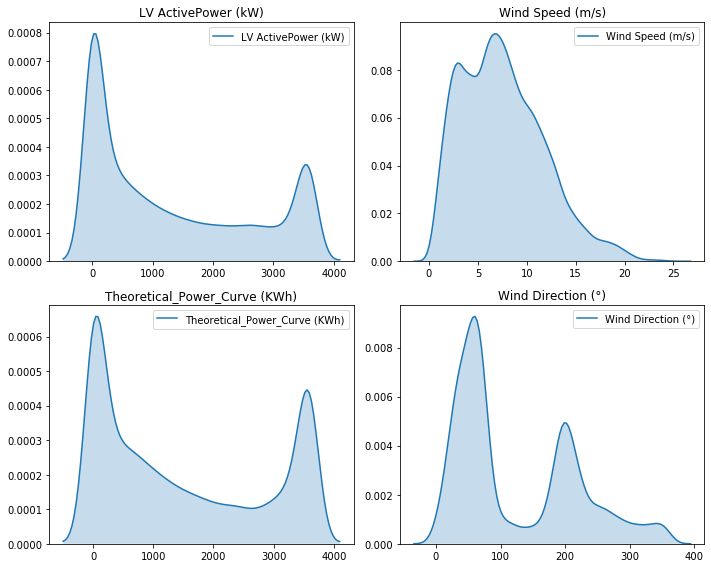

In [39]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data_T_start.iloc[:,i+1], shade=True)
    plt.title(data_T_start.columns[i+1])
plt.tight_layout()
plt.show()

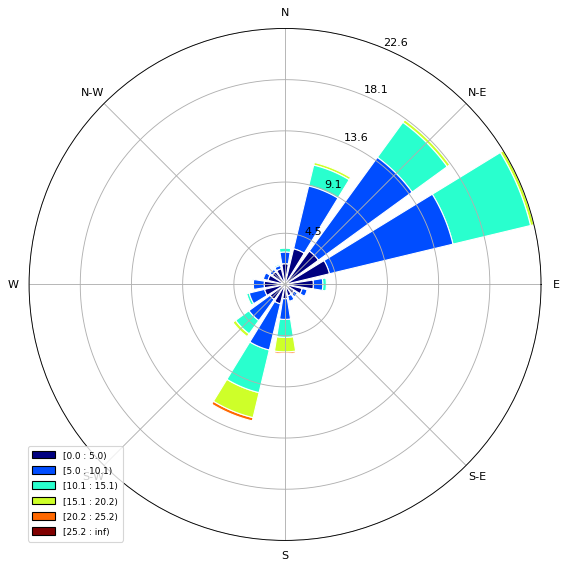

In [40]:
ax = WindroseAxes.from_ax()
ax.bar(data_T_start['Wind Direction (°)'], data_T_start['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

## Energy Prediction

In [41]:
import datetime
import time

In [42]:
data=pd.read_csv('../input/wind-turbine-scada-dataset/T1.csv')
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [43]:
data.rename(columns={'Theoretical_Power_Curve (KWh)':'Power','LV ActivePower (kW)':'ActivePower',"Wind Speed (m/s)":"WindSpeed","Wind Direction (°)":"WindDirection"},
                inplace=True)
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [44]:
data['Time']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40


In [45]:
temp=data['Time'][1:].values - data['Time'][0:-1].values
temp=np.array([0]+list(temp))

In [46]:
data['TimeDiff']=temp

In [47]:
data.tail()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724,10,10
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599,20,10
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500,30,10
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913,40,10
50529,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620,50,10


In [48]:
data['Gust']=np.array([0]+list(data['WindSpeed'][1:].values-data['WindSpeed'][:-1].values))
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,0,0,0.000000
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10,10,0.360831
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20,10,-0.456130
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,30,10,0.443637
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40,10,-0.081733


In [49]:
data.dtypes

Date/Time         object
ActivePower      float64
WindSpeed        float64
Power            float64
WindDirection    float64
Time               int64
TimeDiff           int64
Gust             float64
dtype: object

In [50]:
data_=data[data['TimeDiff'].isin([10,-50])]
data_.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10,10,0.360831
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20,10,-0.456130
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,30,10,0.443637
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40,10,-0.081733
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,50,10,0.026111


In [51]:
len(data_)

50500

In [52]:
data_=data_[data_['ActivePower']>=0]
data_.describe()

,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
count,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000
mean,1309.932554,7.565593,1494.454238,123.716485,24.997125,-0.002181,0.001787
std,1312.471586,4.226063,1367.906548,93.425141,17.078962,22.362852,0.742791
min,0.000000,0.000000,0.000000,0.000000,0.000000,-50.000000,-14.075440
25%,53.512621,4.212597,163.517562,49.344398,10.000000,10.000000,-0.380538
50%,828.896973,7.114135,1068.206544,73.689552,20.000000,10.000000,0.001451
75%,2485.947510,10.307985,2969.201056,201.697906,40.000000,10.000000,0.379923
max,3618.732910,25.206011,3600.000000,359.997589,50.000000,10.000000,17.411289


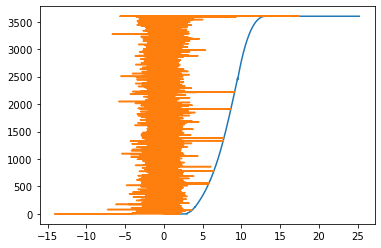

In [53]:
x=data_.sort_values(by='WindSpeed')['WindSpeed']
y=data_.sort_values(by='WindSpeed')['Power']
z=data_.sort_values(by='WindSpeed')['Gust']

plt.plot(x,y)
plt.plot(z,y)

In [54]:
x_train=data_[['WindSpeed','WindDirection','Gust']].values
y_train=data_['ActivePower'].values

## Training

In [55]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, StackingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor

In [56]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=15).get_n_splits(data_.values)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [57]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.5))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score


Lasso score: 532.5939 (166.2872)



array([838.45847838, 438.69383302, 350.88994159, 482.73217465,
       552.19514451])

In [58]:
HistGB=HistGradientBoostingRegressor(learning_rate=0.18,max_iter=100,max_leaf_nodes=4)

score = rmsle_cv(HistGB)
print("Hist Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score

Hist Gradient Boosting score: 392.9342 (190.7309)



array([706.68074765, 267.68963625, 208.6759408 , 260.79656892,
       520.82826174])

In [59]:

KNR=KNeighborsRegressor(n_neighbors=8, weights='uniform', algorithm='auto', leaf_size=100, p=1, metric='minkowski')

score = rmsle_cv(KNR)
print("KNR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score

KNR score: 432.0385 (180.3508)



array([717.42917953, 294.25463431, 250.46500532, 329.32630819,
       568.71743596])

In [60]:
model_xgb1 = xgb.XGBRegressor(learning_rate=2e-2, max_depth=4, 
                             min_child_weight=1.1, n_estimators=100,
                             reg_alpha=0.3, reg_lambda=0.7,
                             #subsample=0.5213, silent=1,
                             nthread = -1)

In [61]:
model_xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.02, max_delta_step=0, max_depth=4,
             min_child_weight=1.1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0.3,
             reg_lambda=0.7, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [62]:
preds=model_xgb1.predict(x_train)
score=mean_squared_error(y_train,preds)
score**0.5

450.24259360681566

In [63]:
r2_score(y_train,preds)

0.882314774332115

In [64]:
model_xgb1.predict(np.array([6.02,110.0,0.23]).reshape(1,-1))

array([454.7521], dtype=float32)

In [65]:
model_lgb1 = lgb.LGBMRegressor(objective='regression',num_leaves=2,
                              learning_rate=0.07, n_estimators=80,
                              #max_bin = 255, bagging_fraction = 0.8,
                              #bagging_freq = 5, feature_fraction = 0.8,
                              #feature_fraction_seed=9, bagging_seed=9,
                              reg_alpha=0.3,reg_lambda=0.7,
                              #min_data_in_leaf =3, min_sum_hessian_in_leaf = 2
                             )

In [66]:
model_lgb1.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.07, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=80, n_jobs=-1, num_leaves=2, objective='regression',
              random_state=None, reg_alpha=0.3, reg_lambda=0.7, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [67]:
preds=model_lgb1.predict(x_train)
score=mean_squared_error(y_train,preds)
score**0.5

391.9123625549006

In [68]:
r2_score(y_train,preds)

0.910832474267455

In [69]:
model_lgb1.predict(np.array([6.02,110.0,0.23]).reshape(1,-1))

array([542.52738079])

## Testing

In [70]:
test=[]
for i in range(1,6):
    test.append(pd.read_csv(f'../input/testwindpower/test{i}.csv'))


In [71]:
test=pd.concat(test,axis=0)
test.head()

,Date,Speed (m/s),Direction (º),Energy (kWh)
0,02/02/2019 00:10:00,"9,80",320,"1.110,15"
1,02/02/2019 00:20:00,"12,56",315,"1.538,99"
2,02/02/2019 00:30:00,"10,77",306,"1.249,69"
3,02/02/2019 00:40:00,"9,59",310,"906,68"
4,02/02/2019 00:50:00,"8,89",308,"910,95"


In [72]:
test.sort_values(by='Date',inplace=True)
test.head()

,Date,Speed (m/s),Direction (º),Energy (kWh)
0,01/02/2019 00:10:00,"12,66",224,"1.988,51"
1,01/02/2019 00:20:00,"14,01",225,"2.136,08"
2,01/02/2019 00:30:00,"12,32",220,"2.050,72"
3,01/02/2019 00:40:00,"13,08",218,"2.028,79"
4,01/02/2019 00:50:00,"12,59",220,"1.739,57"


In [73]:
test.columns=['Date','Speed','Direction','Energy']
test.head()

,Date,Speed,Direction,Energy
0,01/02/2019 00:10:00,"12,66",224,"1.988,51"
1,01/02/2019 00:20:00,"14,01",225,"2.136,08"
2,01/02/2019 00:30:00,"12,32",220,"2.050,72"
3,01/02/2019 00:40:00,"13,08",218,"2.028,79"
4,01/02/2019 00:50:00,"12,59",220,"1.739,57"


In [74]:
len(test)

9360

In [75]:
for col in test.columns[1::2]:
    test[col]=test[col].apply(lambda x: float(x.replace(".","").replace(",",".")))

In [76]:
test.head()

,Date,Speed,Direction,Energy
0,01/02/2019 00:10:00,12.66,224,1988.51
1,01/02/2019 00:20:00,14.01,225,2136.08
2,01/02/2019 00:30:00,12.32,220,2050.72
3,01/02/2019 00:40:00,13.08,218,2028.79
4,01/02/2019 00:50:00,12.59,220,1739.57


In [77]:
test['Gust']=np.array([0]+list(test['Speed'][1:].values-test['Speed'][:-1]))
test.head()

,Date,Speed,Direction,Energy,Gust
0,01/02/2019 00:10:00,12.66,224,1988.51,0.00
1,01/02/2019 00:20:00,14.01,225,2136.08,1.35
2,01/02/2019 00:30:00,12.32,220,2050.72,-1.69
3,01/02/2019 00:40:00,13.08,218,2028.79,0.76
4,01/02/2019 00:50:00,12.59,220,1739.57,-0.49


In [78]:
x_val=test[['Speed','Direction','Gust']].values
y_val=test['Energy'].values
x_val.shape

(9360, 3)

In [79]:
preds1=model_xgb1.predict(x_val)
preds1.shape

(9360,)

In [80]:
preds2=model_lgb1.predict(x_val)
preds2.shape

(9360,)

## XGBoost Score

In [81]:
score=mean_squared_error(y_val,preds1)
score**0.5

497.9233538118226

In [82]:
r2_score(y_val,preds1)

0.3821888069845253

## LGBM Score

In [83]:
score=mean_squared_error(y_val,preds2)
score**0.5

649.5104328653177

In [84]:
r2_score(y_val,preds2)

-0.05124282001762803

## Let's See the Predictions

Text(0.5, 1.0, 'XGB')

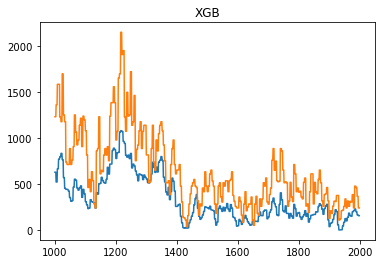

In [85]:
sam=1000
f=2
plt.plot(range(sam,f*sam),y_val[sam:f*sam])
plt.plot(range(sam,f*sam),preds1[sam:f*sam])
plt.title('XGB')

Text(0.5, 1.0, 'LGB')

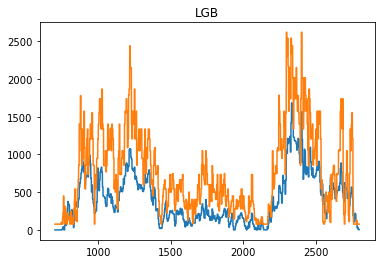

In [86]:
sam=700
f=4
plt.plot(range(sam,f*sam),y_val[sam:f*sam])
plt.plot(range(sam,f*sam),preds2[sam:f*sam])
plt.title('LGB')

# Notes

This was just a baseline trial of predicting the power output given wind speed and direction.

More better fitting of model is very much possible with some hyperparameter tuning and ensemble methods.

Test data was scraped from some different conditions and location of wind turbine.

Great variance can be seen in testing data due to different conditions and location.